# Introduction to the workflow structure

This notebook gives a brief overview of the workflow structure and introduces some useful DataJoint tools to facilitate the exploration.

+ DataJoint needs to be pre-configured before running this notebook, if you haven't set up the configuration, refer to notebook [01-configure](01-configure.ipynb).

+ If you are familar with DataJoint and the workflow structure, proceed to the next notebook [03-process](03-process.ipynb) directly to run the workflow.

+ For a more thorough introduction of DataJoint functionings, please visit our [general tutorial site](https://playground.datajoint.io)

To load the local configuration, we will change the directory to the package root.

In [1]:
import os
os.chdir('../..')

## Schemas and tables

+ The current workflow is composed of multiple database schemas, each of them corresponds to a module within `u19_pipeline`

In [32]:
import datajoint as dj

# modules within original u19_pipeline
from u19_pipeline import lab, subject, acquisition, imaging

# modules defined in DataJoint Calcium Imaging element, installed to u19_pipeline
from u19_pipeline.imaging_element import scan_element, imaging_element

+ `imaging`: module defined in u19_pipeline. The contents in the tables of this module were processed by MATLAB cnmf algorithms.
+ `scan_element` and `imaging_element`: modules defined with [DataJoint element calcium imaging](https://github.com/datajoint/element-calcium-imaging). In U19 pipeline, `scan_element` and `imaging_element` was used to store data processed with Suite2p.

+ Each module contains a schema object that enables interaction with the schema in the database.

In [6]:
imaging_element.schema

Schema `u19_imaging_element`

+ The table classes in the module corresponds to a table in the schema in the database.

In [8]:
# preview columns and contents in a table
imaging_element.Processing()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,scan_id,paramset_idx,"processing_time time of generation of this set of processed, segmented results"
emdiamanti_gps8,2021-02-09,0,1,0,2021-02-28 00:32:23
emdiamanti_gps8,2021-02-09,0,2,0,2021-02-28 01:31:33
emdiamanti_gps8,2021-02-09,0,3,0,2021-02-28 02:13:31
testuser_imaging_pipe1,2021-03-02,0,1,0,2021-03-11 11:54:11
testuser_imaging_pipe1,2021-03-02,0,2,0,2021-03-11 11:54:34
testuser_imaging_pipe1,2021-03-02,0,3,0,2021-03-11 11:55:02


+ By importing the modules for the first time, the schemas and tables will be created inside the database.

+ Once created, importing modules will not create schemas and tables again, but the existing schemas/tables can be accessed and manipulated by the modules.

## DataJoint tools to explore schemas and tables

+ `dj.list_schemas()`: list all schemas a user has access to in the current database

In [9]:
dj.list_schemas()

['U19_subject',
 'aarusso_pipeline',
 'aarusso_puffs',
 'aarusso_puffs_py',
 'aarusso_tutorial',
 'abondy_tutorial',
 'ahoag_admin_demo',
 'ahoag_admin_flask_demo',
 'ahoag_celery_test',
 'ahoag_lab_test',
 'ahoag_lightsheet_demo',
 'ahoag_microscope_demo',
 'ahoag_microscope_demo_old',
 'ahoag_puffs_acquisition_demo',
 'ahoag_puffs_behavior_demo',
 'ahoag_puffs_lab_demo',
 'ahoag_spockadmin_demo',
 'ahoag_test',
 'ahoag_test_db',
 'ahoag_test_django',
 'ahoag_tutorial',
 'alvaros_experiment',
 'brody_2pdemo',
 'brody_trash',
 'brody_tutorial2',
 'brody_tutorial3',
 'brody_tutorial5',
 'ckopec_tutorial_db',
 'diamanti_mesotables',
 'diamanti_tutorial',
 'dikshag_pipeline',
 'dikshag_tutorial',
 'gtm_testdb',
 'jounhong_session1',
 'jounhong_tutorial',
 'jyanar_tutorial3',
 'lpinto_tutorial',
 'ms81_tutorial',
 'mysql',
 'performance_schema',
 'pni_subject',
 'sf11_DTSC',
 'shans_acquisition',
 'shans_action',
 'shans_behavior',
 'shans_imaging',
 'shans_lab',
 'shans_neuro_ephys',
 'sh

+ `dj.Diagram()`: plot tables and dependencies in a schema. 

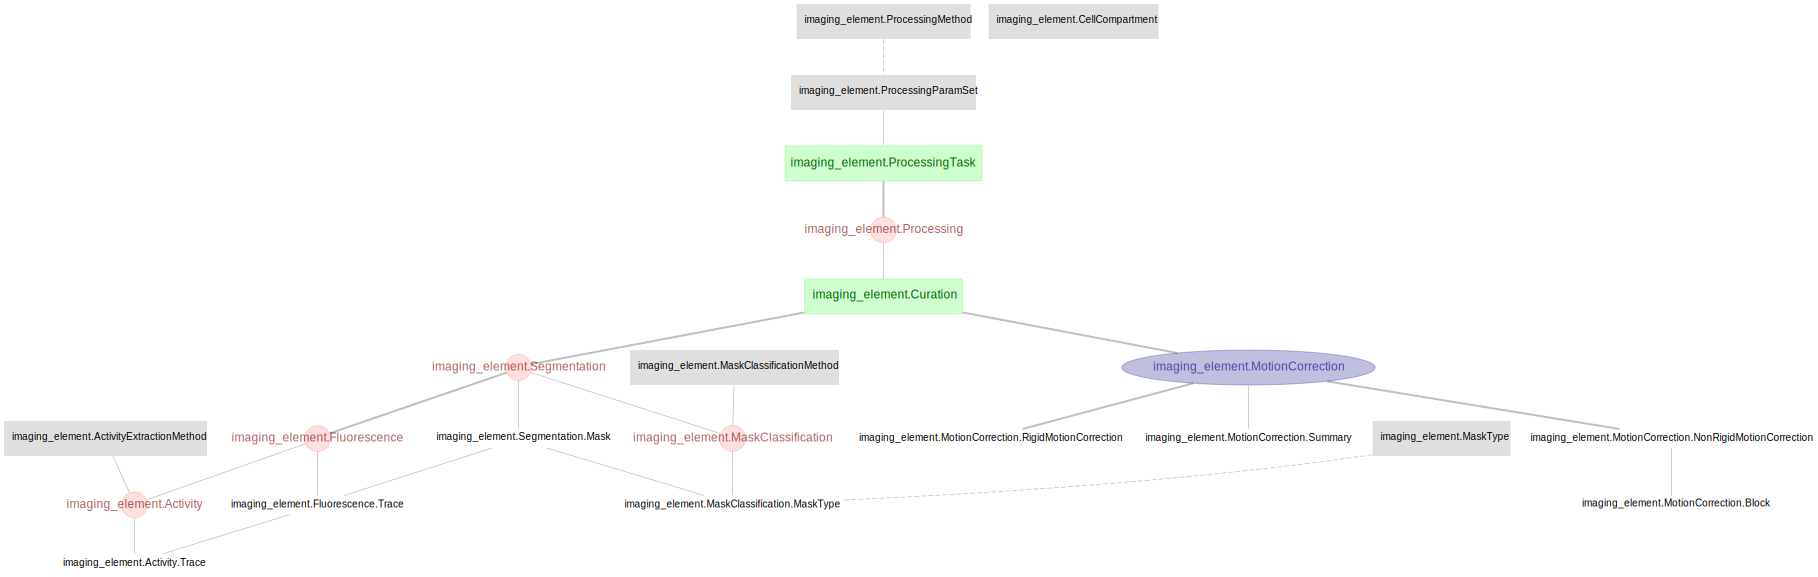

In [11]:
# plot diagram for all tables in a schema
dj.Diagram(imaging_element)

**Table tiers**: 

Manual table: green box, manually inserted table, expect new entries daily, e.g. `Subject`, `Session`.

Lookup table: gray box, pre inserted table, commonly used for general facts or parameters. e.g. `Strain`, `ProcessingMethod`, `ProcessingParamSet`.

Imported table: blue oval, auto-processing table, the processing depends on the importing of external files. e.g. populte table `Processing` requires output files from Suite2p or CaImAn.   

Computed table: red circle, auto-processing table, the processing does not depend on files external to the database, commonly used for data analyses, such as the tables `Fluorescence` and `Activity`, whose results are computed from the data in the table `Segmentation`.      

Part table: plain text, as an appendix to the master table, all the part entries of a given master entry represent a intact set of the master entry. e.g. `Mask` from a `Segmentation`.

**Dependencies**:  

One-to-one primary: thick solid line, share the exact same primary key, meaning the child table inherits all the primary key fields from the parent table as its own primary key.    

One-to-many primary: thin solid line, inherit the primary key from the parent table, but have additional field(s) as part of the primary key as well.     

Secondary dependency: dashed line, the child table inherits the primary key fields from parent table as its own secondary attribute.

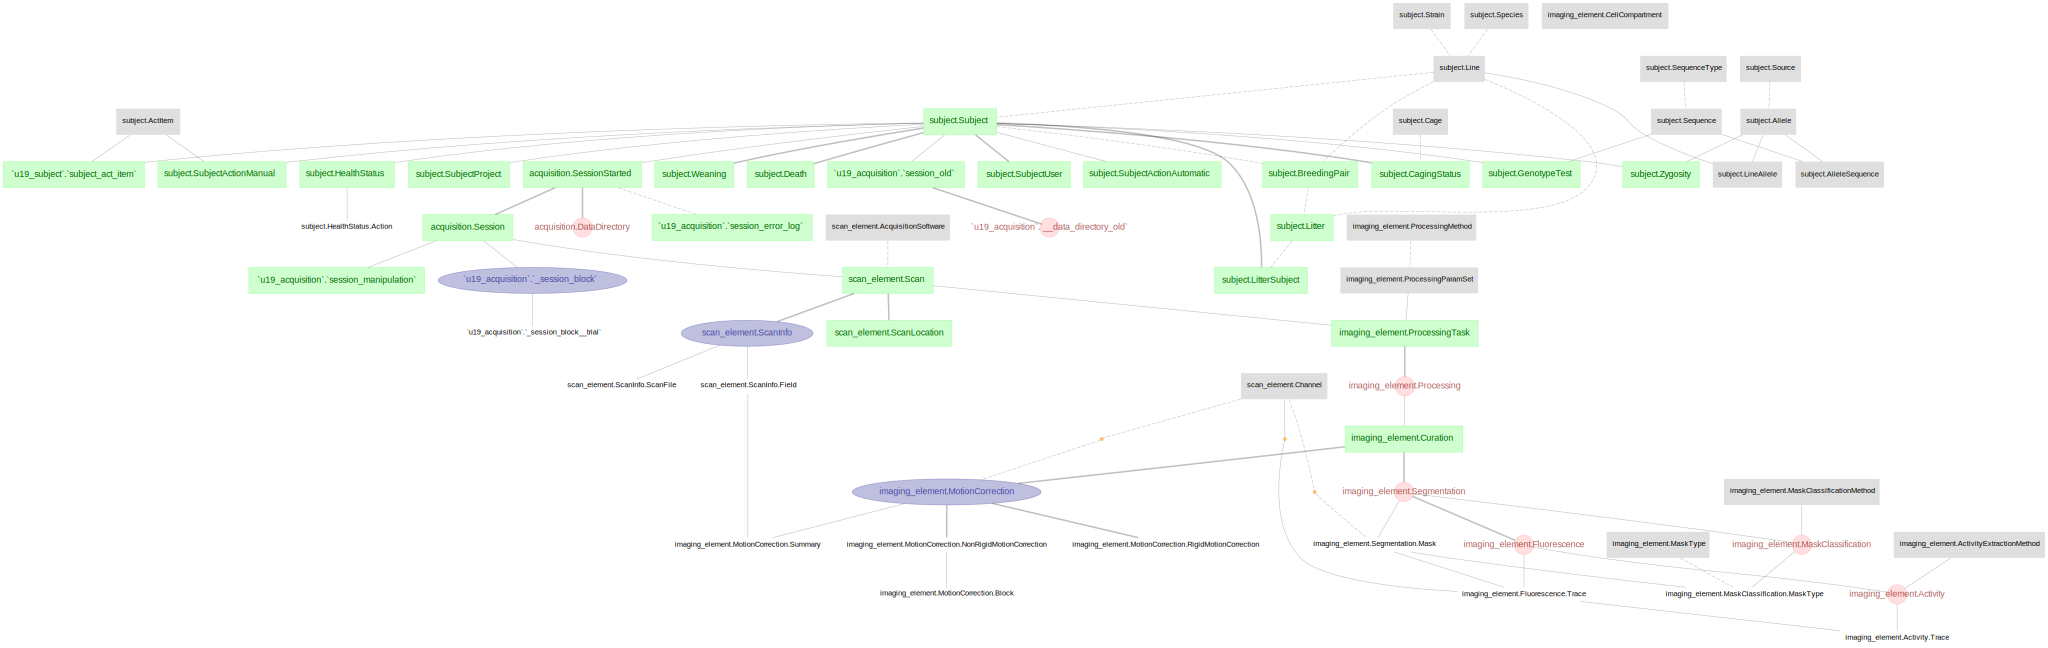

In [30]:
# plot diagram of tables in multiple schemas
dj.Diagram(subject) + dj.Diagram(acquisition) + dj.Diagram(scan_element) + dj.Diagram(imaging_element)

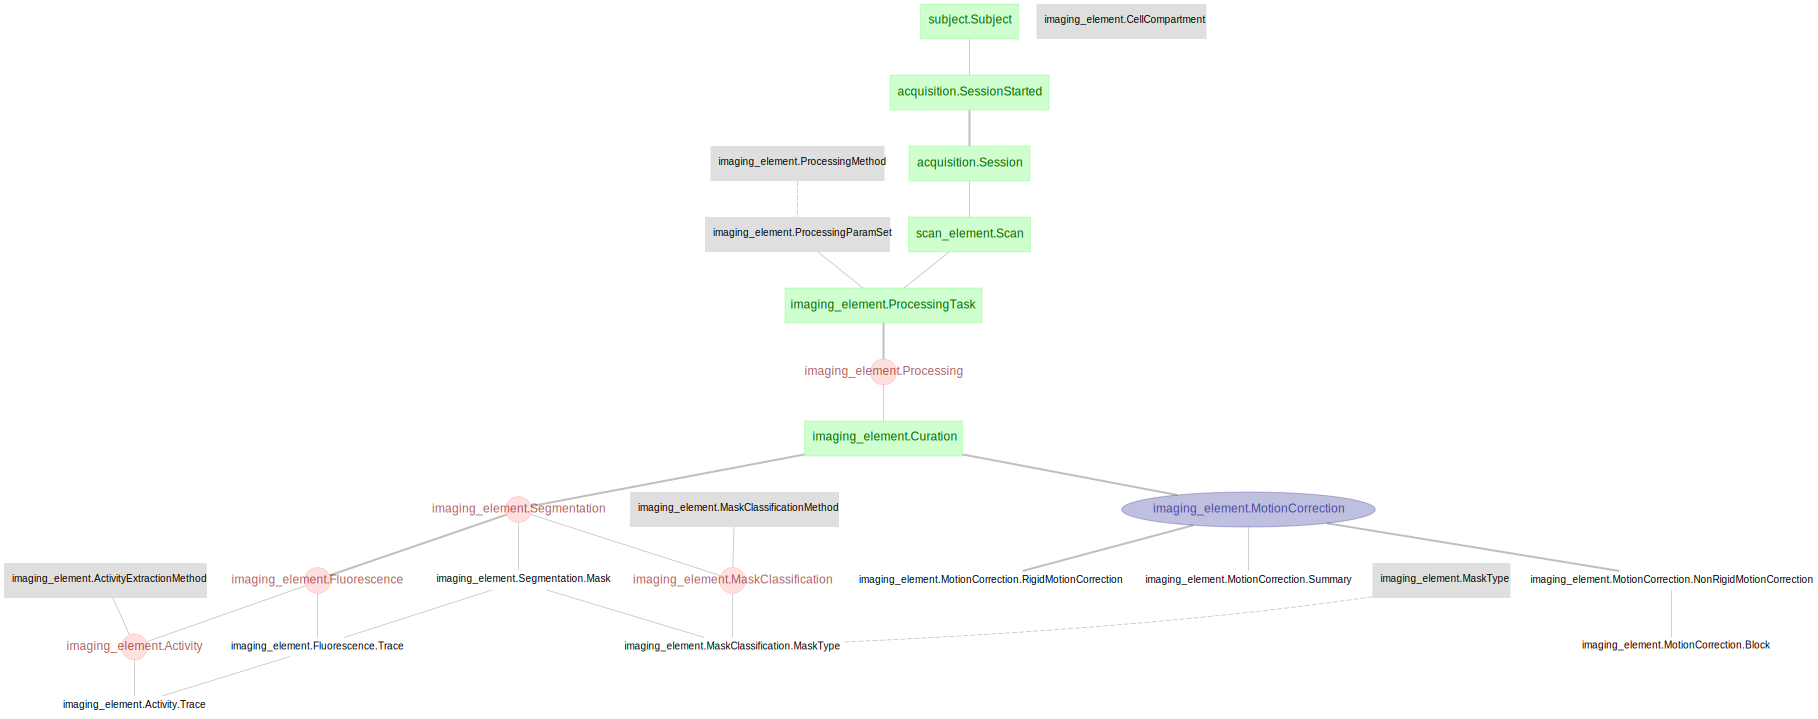

In [16]:
# plot diagram of selected tables and schemas
dj.Diagram(subject.Subject) + dj.Diagram(acquisition.Session) + dj.Diagram(imaging_element)

+ `describe()`: show table definition with foreign key references.

In [18]:
imaging_element.Processing.describe();

-> imaging_element.ProcessingTask
---
processing_time      : datetime                     # time of generation of this set of processed, segmented results



+ `heading`: show attribute definitions regardless of foreign key references

In [19]:
imaging_element.Processing.heading

# 
subject_fullname     : varchar(64)                  # username_mouse_nickname
session_date         : date                         # date of experiment
session_number       : int                          # number
scan_id              : int                          # 
paramset_idx         : smallint                     # 
---
processing_time      : datetime                     # time of generation of this set of processed, segmented results

# Major tables in the calcium imaging workflow


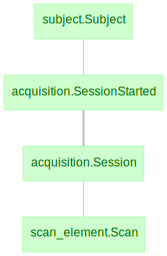

In [28]:
# subject, session and scan
dj.Diagram(subject.Subject) + dj.Diagram(acquisition.Session) + dj.Diagram(scan_element.Scan)

In [34]:
scan_element.Scan().describe();

-> acquisition.Session
scan_id              : int                          
---
-> `u19_lab`.`equipment`
-> scan_element.AcquisitionSoftware
scan_notes=""        : varchar(4095)                # free-notes



In [35]:
subject.Subject.describe();

subject_fullname     : varchar(64)                  # username_mouse_nickname
---
subject_nickname     : varchar(16)                  
-> lab.User
genomics_id=null     : int                          # number from the facility
sex="Unknown"        : enum('Male','Female','Unknown') # sex
dob=null             : date                         # birth date
head_plate_mark=null : blob                         # little drawing on the head plate for mouse identification
-> lab.Location
-> [nullable] lab.Protocol
-> [nullable] subject.Line
subject_description="" : varchar(255)                 # description
initial_weight=null  : float                        



In [36]:
acquisition.Session.describe();

-> acquisition.SessionStarted
---
session_start_time   : datetime                     # start time
session_end_time=null : datetime                     # end time
-> lab.Location.proj(session_location="location")
-> acquisition.task.TaskLevelParameterSet
stimulus_bank=""     : varchar(255)                 # path to the function to generate the stimulus
stimulus_commit=""   : varchar(64)                  # git hash for the version of the function
session_performance  : float                        # percentage correct on this session
num_trials=null      : int                          # Number of trials for the session
num_trials_try=null  : tinyblob                     # Accumulative number of trials for each try of the session
session_narrative="" : varchar(512)                 
session_protocol=null : varchar(255)                 # function and parameters to generate the stimulus
session_code_version=null : blob                         # code version of the stimulus, maybe a version 

+ [`scan_element` and `imaging_element`](https://github.com/datajoint/element-calcium-imaging): Calcium imaging raw scan and processed data

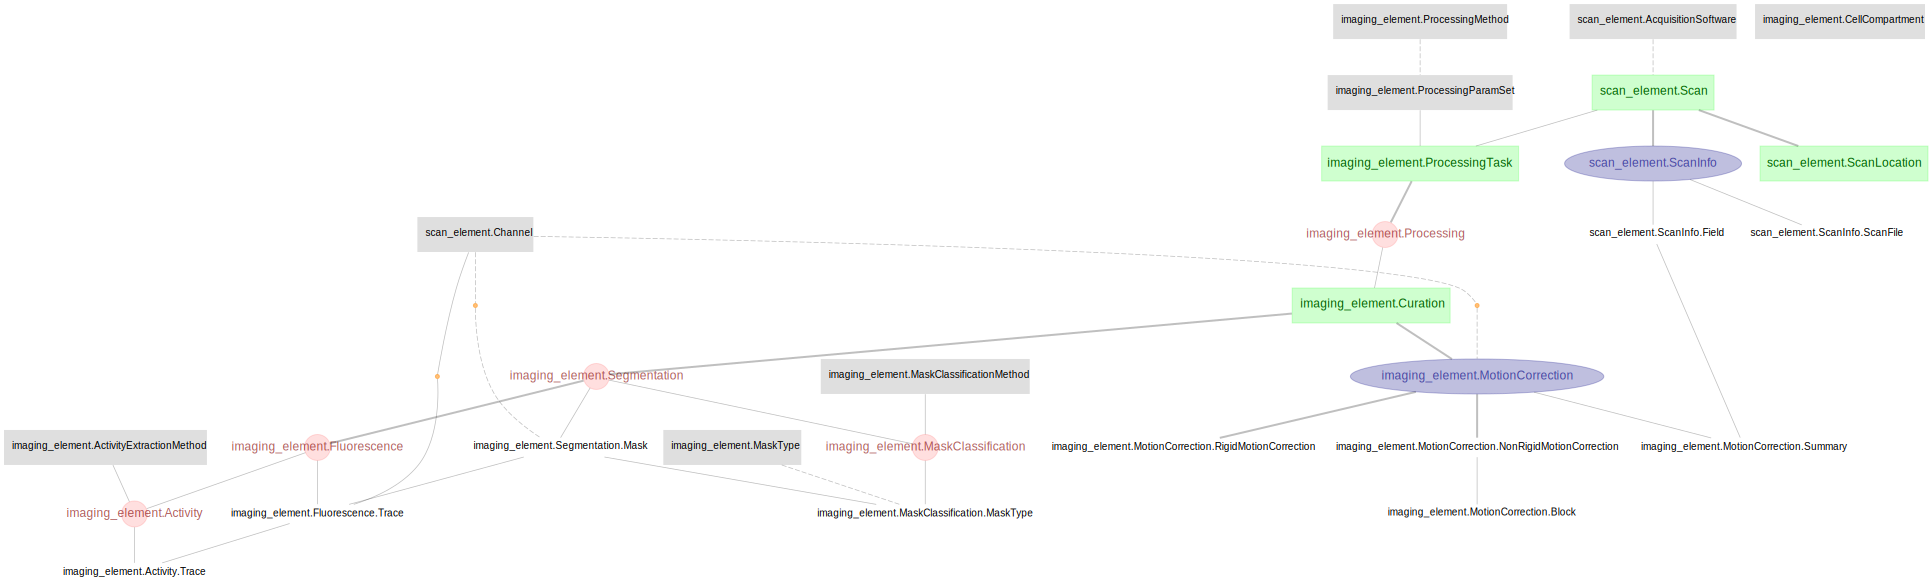

In [37]:
dj.Diagram(scan_element) + dj.Diagram(imaging_element)

## Summary and next step

+ This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

+ In the next notebook [02-process-imaging-workflow](02-process-imaging-workflow.ipynb), we will introduce the detailed steps to run through calcium imaging workflow.